In [ ]:
''' The goal of this project is to determine the factors that influence gross revenue earnings
in the movie industry by employing correlation analysis methods using Python. '''

In [143]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data

df = pd.read_csv("/movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [144]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [145]:
# Remove missing data

df.dropna(subset = ['rating', 'budget', 'gross'], inplace = True)

In [146]:
# Check again

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [147]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [148]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [149]:
# sort the data by gross in descending order

df.sort_values(by=['gross'], inplace=False, ascending=False).head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [150]:
print(len(df))

5424


In [151]:
# Drop any duplicates

df.drop_duplicates(inplace=True)

In [152]:
print(len(df))

5424


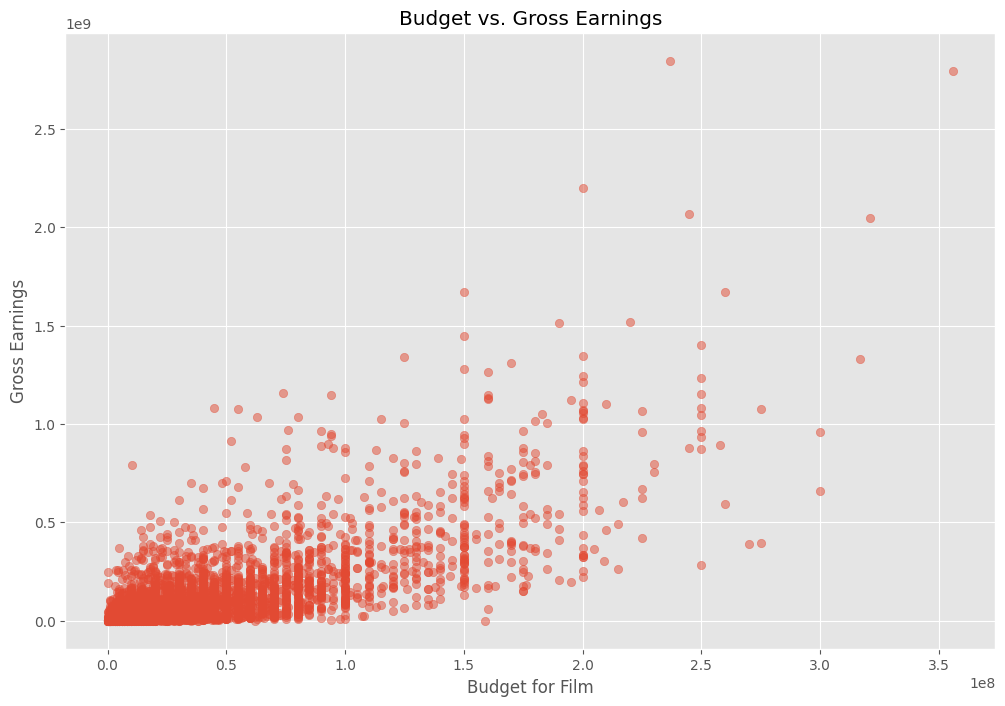

In [155]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], alpha = 0.5)
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

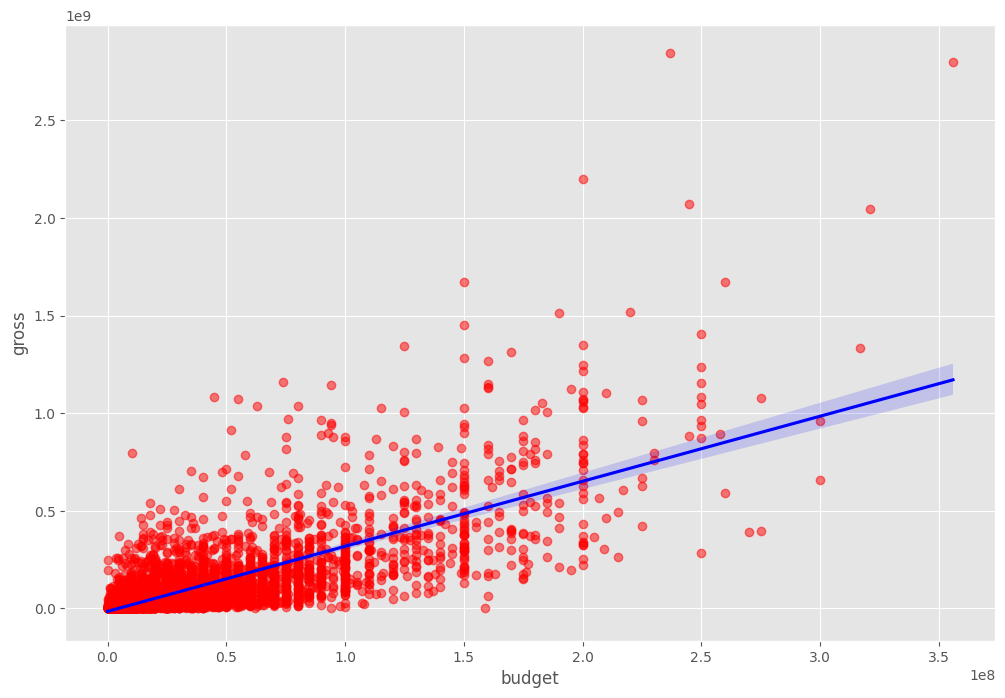

In [158]:
# Plot budget vs gross using seaborn

sns.regplot(x = "budget", y = "gross", data = df, scatter_kws={"color":"red", 'alpha':0.5}, line_kws={"color":"blue"})

In [72]:
# Correlation Matrix between all numeric columns

df.corr(method = 'pearson') # pearson, kendall, spearman

<ipython-input-72-4e0b45fe7e91>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056506,0.206161,0.327961,0.274395,0.075173
score,0.056506,1.000000,0.474349,0.072155,0.222709,0.414145
votes,0.206161,0.474349,1.000000,0.439757,0.614808,0.352331
budget,0.327961,0.072155,0.439757,1.000000,0.740263,0.318718
gross,0.274395,0.222709,0.614808,0.740263,1.000000,0.275830
runtime,0.075173,0.414145,0.352331,0.318718,0.275830,1.000000


<ipython-input-75-4222bb99bb6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


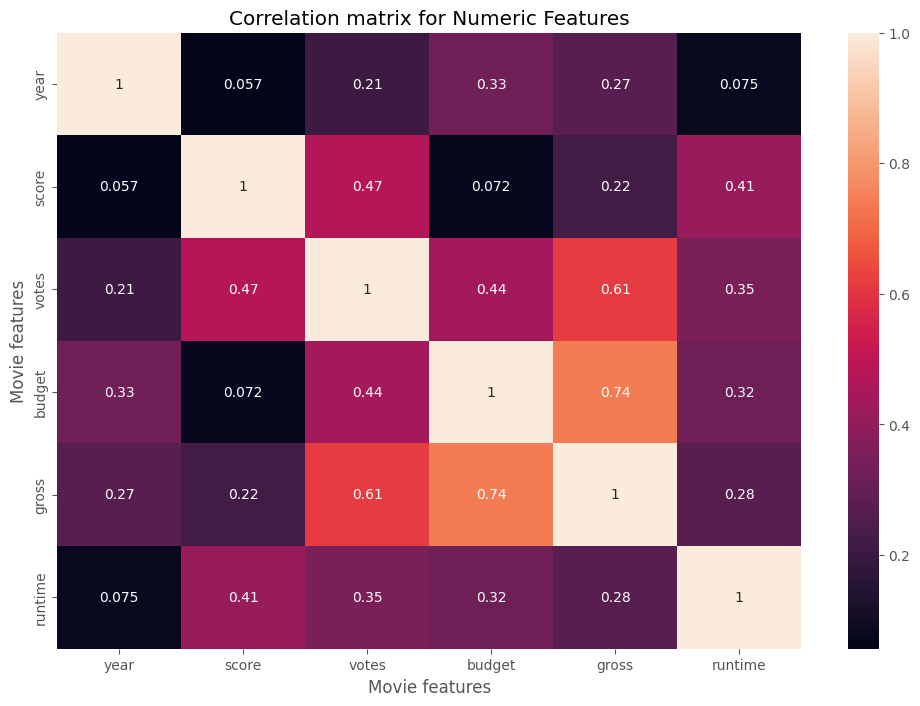

In [75]:
# Correlation matrix

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [159]:
# Create a copy of the original DataFrame to perform numeric conversion
df_numerized = df

# Iterate through each column in the DataFrame
for col_name in df_numerized.columns:
    # Check if the data type of the column is 'object' (categorical)
    if df_numerized[col_name].dtype == 'object':
        # Convert the column to the 'category' data type
        df_numerized[col_name] = df_numerized[col_name].astype('category')

        # Replace the categorical values with corresponding category codes (numeric)
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Print the DataFrame with numeric values
print(df_numerized)


      name  rating  genre  year  released  score      votes  director  writer  \
0     4695       6      6  1980      1304    8.4   927000.0      1797    2834   
1     3932       6      1  1980      1127    5.8    65000.0      1579    1159   
2     3643       4      0  1980      1359    8.7  1200000.0       757    1819   
3      204       4      4  1980      1127    7.7   221000.0       889    1414   
4      732       6      4  1980      1170    7.3   108000.0       719     352   
5     1509       6      9  1980      1922    6.4   123000.0      1760    3083   
6     3933       6      0  1980      1359    7.9   188000.0       974     577   
7     3124       6      3  1980       530    8.2   330000.0      1270    1258   
8     3734       4      0  1980      1346    6.8   101000.0      1608    1403   
9     4404       6      3  1980      1755    7.0    10000.0      2013     281   
10     332       4      0  1980       510    6.1    18000.0       236    2812   
11    4182       4      1  1

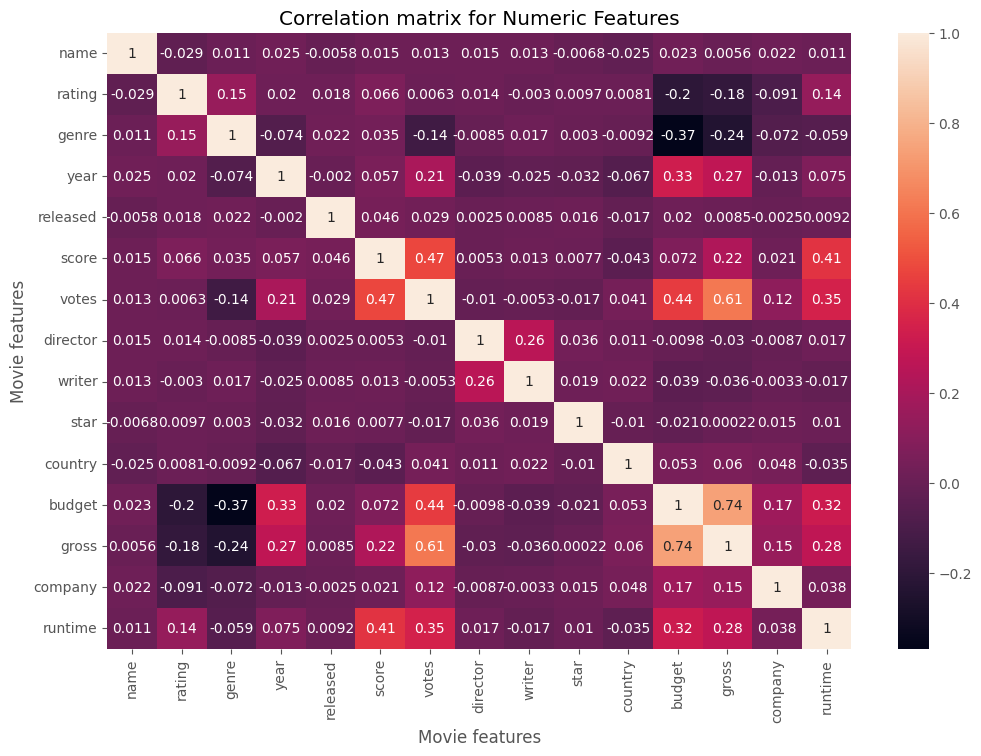

In [160]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [80]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

name      name        1.000000
          rating     -0.029271
          genre       0.010838
          year        0.025441
          released   -0.005783
          score       0.014521
          votes       0.012585
          director    0.015320
          writer      0.013143
          star       -0.006788
          country    -0.025467
          budget      0.023336
          gross       0.005613
          company     0.021592
          runtime     0.010949
rating    name       -0.029271
          rating      1.000000
          genre       0.147569
          year        0.020085
          released    0.018011
          score       0.066335
          votes       0.006321
          director    0.014381
          writer     -0.002966
          star        0.009693
          country     0.008061
          budget     -0.203531
          gross      -0.181590
          company    -0.091306
          runtime     0.140886
genre     name        0.010838
          rating      0.147569
        

In [81]:
sorted_pairs = corr_pairs.sort_values(kind = 'quicksort')
print(sorted_pairs)

budget    genre      -0.368521
genre     budget     -0.368521
gross     genre      -0.244034
genre     gross      -0.244034
rating    budget     -0.203531
budget    rating     -0.203531
gross     rating     -0.181590
rating    gross      -0.181590
votes     genre      -0.135954
genre     votes      -0.135954
company   rating     -0.091306
rating    company    -0.091306
year      genre      -0.073532
genre     year       -0.073532
          company    -0.071608
company   genre      -0.071608
country   year       -0.066833
year      country    -0.066833
runtime   genre      -0.059367
genre     runtime    -0.059367
score     country    -0.043207
country   score      -0.043207
budget    writer     -0.039307
writer    budget     -0.039307
director  year       -0.038676
year      director   -0.038676
writer    gross      -0.035842
gross     writer     -0.035842
runtime   country    -0.034514
country   runtime    -0.034514
year      star       -0.031559
star      year       -0.031559
director

In [161]:
# We can now take a look at the ones that have high correlation (> 0.5)

strong_pairs = sorted_pairs[sorted_pairs > 0.5]
print(strong_pairs)

votes     gross       0.614808
gross     votes       0.614808
          budget      0.740263
budget    gross       0.740263
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [24]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
print(CompanyGrossSumSorted)

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64


In [ ]:
''' Results: The factors with the most significant impact on gross revenue earnings in the movie industry are votes and budget.
Based on these findings, it is advisable for companies to consider investing more in their movies to garner higher votes from the audience.
When viewers are satisfied with the film, it is likely to result in improved earnings. '''

# Neuer Abschnitt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')